In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Read the csv
df = pd.read_csv('../../../archive/2022/heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
int(df.duplicated().sum())

9

In [4]:
df = df.drop_duplicates()

In [5]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [6]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Return values of non numerical columns 
def printUniqueValues(df,column):
    return f'Column: {column} Values: {df[column].unique()}'
def categorical_into_numerical_yes_no(df,column):
    return  df[column].apply(lambda val: 0 if( val == 'No') else 1 if (val == 'Yes') else  val)
for column in non_numeric_columns:
    row = printUniqueValues(df, column)
    print(row)

Column: State Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Column: Sex Values: ['Female' 'Male']
Column: GeneralHealth Values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Column: LastCheckupTime Values: ['Within past year (anytime less than 12 months ago)'
 '5 or more years ago'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years

In [7]:
df.loc[:,'Sex_n'] = df['Sex'].apply(lambda val: 0 if( val == 'Male') else 1 ) # 0 if male 1 if female
df.loc[:,'LastCheckupTime_n'] = df['LastCheckupTime'].apply( lambda val: 0 if (val == 'Within past year (anytime less than 12 months ago)')
                                                            else 1 if (val == 'Within past 2 years (1 year but less than 2 years ago)') 
                                                            else 2 if (val == 'Within past 5 years (2 years but less than 5 years ago)')
                                                            else 3 if (val ==  '5 or more years ago')
                                                            else val)
df.loc[:,'RemovedTeeth_n'] = df['RemovedTeeth'].apply(lambda val: 0 if (val == 'None of them') 
                                                        else 1 if (val == '1 to 5')
                                                        else 2 if (val == '6 or more, but not all' )
                                                        else 3 if (val == 'All')
                                                        else val)
df.loc[:,'GeneralHealth_n'] = df['GeneralHealth'].apply(lambda val: 0 if val == 'Poor'
                                                          else 1 if val == 'Fair'  
                                                          else 2 if val == 'Good'
                                                          else 3 if val == 'Very good'
                                                          else 4 if val == 'Excellent'
                                                          else val) 
df.loc[:,'CovidPos_n'] = df['CovidPos'].apply(lambda val: 0 if (val == 'No')
                                                else 1 if (val == 'Tested positive using home test without a health professional')
                                                else 2 if (val == 'Yes')
                                                else val)
df.loc[:,'TetanusLast10Tdap_n'] = df['TetanusLast10Tdap'].apply(lambda val: 0 if (val == 'Yes, received Tdap') 
                                                                else 1 if (val == 'Yes, received tetanus shot, but not Tdap' )
                                                                else 2 if (val == 'Yes, received tetanus shot but not sure what type')
                                                                else 3 if (val == 'No, did not receive any tetanus shot in the past 10 years')
                                                                else val)
df.loc[:,'AgeCategory_n'] = df['AgeCategory'].apply(lambda val: 18 if val == 'Age 18 to 24'
                                                          else 25 if val == 'Age 25 to 29'  
                                                          else 30 if val == 'Age 30 to 34'
                                                          else 35 if val == 'Age 35 to 39'
                                                          else 40 if val == 'Age 40 to 44'
                                                          else 45 if val == 'Age 45 to 49'
                                                          else 50 if val == 'Age 50 to 54'
                                                          else 55 if val == 'Age 55 to 59'
                                                          else 60 if val == 'Age 60 to 64'
                                                          else 65 if val == 'Age 65 to 69'
                                                          else 70 if val == 'Age 70 to 74'
                                                          else 75 if val == 'Age 75 to 79'
                                                          else 80 if val == 'Age 80 or older'
                                                          else val) # Age into numerical category based on start age of range so 18 to 24 will be 18
df.loc[:,'HadDiabetes_n'] = df['HadDiabetes'].apply(lambda val: 0 if val == 'No'
                                                          else 1 if val == 'No, pre-diabetes or borderline diabetes'  
                                                          else 2 if val == 'Yes, but only during pregnancy (female)'
                                                          else 3 if val == 'Yes'
                                                          else val) # scale from 0 to 3 based on value
df.loc[:,'SmokerStatus_n'] = df['SmokerStatus'].apply(lambda val: 0 if val == 'Never smoked'
                                                          else 1 if val == 'Former smoker' 
                                                          else 2 if val == 'Current smoker - now smokes some days'
                                                          else 3 if val == 'Current smoker - now smokes every day'
                                                          else val) # scale from 0 to 4 based on value
df.loc[:,'ECigaretteUsage_n'] = df['ECigaretteUsage'].apply(lambda val: 0 if val == 'Never used e-cigarettes in my entire life'
                                                          else 1 if val == 'Not at all (right now)' 
                                                          else 2 if val == 'Use them some days'
                                                          else 3 if val == 'Use them every day'
                                                          else val) # scale from 0 to 4 based on value

for column in non_numeric_columns:
    unique_values = set(df[column].unique())  
    if unique_values.issubset({'Yes', 'No'}):  
        df[f'{column}_n'] = categorical_into_numerical_yes_no(df, column)
        df.drop(columns=[column], inplace=True)
df.drop(columns=['State','Sex','GeneralHealth','AgeCategory','HadDiabetes','SmokerStatus','ECigaretteUsage','RaceEthnicityCategory','LastCheckupTime'
                 ,'RemovedTeeth','CovidPos','TetanusLast10Tdap'], inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   PhysicalHealthDays           246013 non-null  float64
 1   MentalHealthDays             246013 non-null  float64
 2   SleepHours                   246013 non-null  float64
 3   HeightInMeters               246013 non-null  float64
 4   WeightInKilograms            246013 non-null  float64
 5   BMI                          246013 non-null  float64
 6   Sex_n                        246013 non-null  int64  
 7   LastCheckupTime_n            246013 non-null  int64  
 8   RemovedTeeth_n               246013 non-null  int64  
 9   GeneralHealth_n              246013 non-null  int64  
 10  CovidPos_n                   246013 non-null  int64  
 11  TetanusLast10Tdap_n          246013 non-null  int64  
 12  AgeCategory_n                246013 non-null  int64  
 13  HadD

In [9]:
df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_n,LastCheckupTime_n,RemovedTeeth_n,GeneralHealth_n,...,DifficultyConcentrating_n,DifficultyWalking_n,DifficultyDressingBathing_n,DifficultyErrands_n,ChestScan_n,AlcoholDrinkers_n,HIVTesting_n,FluVaxLast12_n,PneumoVaxEver_n,HighRiskLastYear_n
0,4.0,0.0,9.0,1.60,71.67,27.99,1,0,0,3,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,6.0,1.78,95.25,30.13,0,0,0,3,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,8.0,1.85,108.86,31.66,0,0,2,3,...,0,1,0,0,1,1,0,0,1,0
3,5.0,0.0,9.0,1.70,90.72,31.32,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
4,3.0,15.0,5.0,1.55,79.38,33.07,1,0,1,2,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,0.0,0.0,6.0,1.78,102.06,32.28,0,1,0,3,...,0,0,0,0,0,1,0,0,0,0
246018,0.0,7.0,7.0,1.93,90.72,24.34,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
246019,0.0,15.0,7.0,1.68,83.91,29.86,0,0,1,2,...,0,0,0,0,0,1,1,1,1,0
246020,2.0,2.0,7.0,1.70,83.01,28.66,1,0,0,4,...,0,0,0,0,0,0,1,1,0,0


In [10]:
print('Distribution of HadHeartAttack')
print('Normalized: ',df['HadHeartAttack_n'].value_counts(normalize=True))
print('Actual: ',df['HadHeartAttack_n'].value_counts())

Distribution of HadHeartAttack
Normalized:  HadHeartAttack_n
0    0.945389
1    0.054611
Name: proportion, dtype: float64
Actual:  HadHeartAttack_n
0    232578
1     13435
Name: count, dtype: int64


In [ ]:
def split_dataset(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    return X_train, X_test, y_train, y_test

def split_dataset_equal_distribution(df, target_column):

    df_heartAttack_0 = df[df[target_column] == 0 ]
    df_heartAttack_1 = df[df[target_column] == 1 ]

    random_samples = df_heartAttack_0.sample(n=len(df_heartAttack_1), random_state=42)

    balanced_df = pd.concat([df_heartAttack_1,random_samples])
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle 

    return balanced_df

#balnces dataset based on provided distribution
def split_dataset_x_distribution(df, target_column,):

    df_heartAttack_0 = df[df[target_column] == 0 ]
    df_heartAttack_1 = df[df[target_column] == 1 ]

    random_samples = df_heartAttack_0.sample(n=len(df_heartAttack_1), random_state=42)

    balanced_df = pd.concat([df_heartAttack_1,random_samples])
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle 

    return balanced_df

In [15]:
df = split_dataset_equal_distribution(df,'HadHeartAttack_n')
X_train, X_test, y_train, y_test = split_dataset(df, target_column='HadHeartAttack_n')

print("Distribution Traing:")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())

print("Distribution Test:")
print(y_test.value_counts(normalize=True))
print(y_test.value_counts())

Distribution Traing:
HadHeartAttack_n
0    0.5
1    0.5
Name: proportion, dtype: float64
HadHeartAttack_n
0    10748
1    10748
Name: count, dtype: int64
Distribution Test:
HadHeartAttack_n
1    0.5
0    0.5
Name: proportion, dtype: float64
HadHeartAttack_n
1    2687
0    2687
Name: count, dtype: int64


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7921
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2687
           1       0.79      0.80      0.79      2687

    accuracy                           0.79      5374
   macro avg       0.79      0.79      0.79      5374
weighted avg       0.79      0.79      0.79      5374



In [30]:

def create_pipeline(X_train, model_type='logistic_regression'):
    numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_columns) 
        ])
    
    if model_type == 'logistic_regression':
        model = LogisticRegression(random_state=42)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(random_state=42, class_weight='balanced')
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
    else:
        raise ValueError("Unbekanntes Modell")

    # Kombiniere Preprocessing + Modell in einer Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    return pipeline

pipeline = create_pipeline(X_train, model_type='decision_tree')
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7810


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2687
           1       0.79      0.76      0.78      2687

    accuracy                           0.78      5374
   macro avg       0.78      0.78      0.78      5374
weighted avg       0.78      0.78      0.78      5374



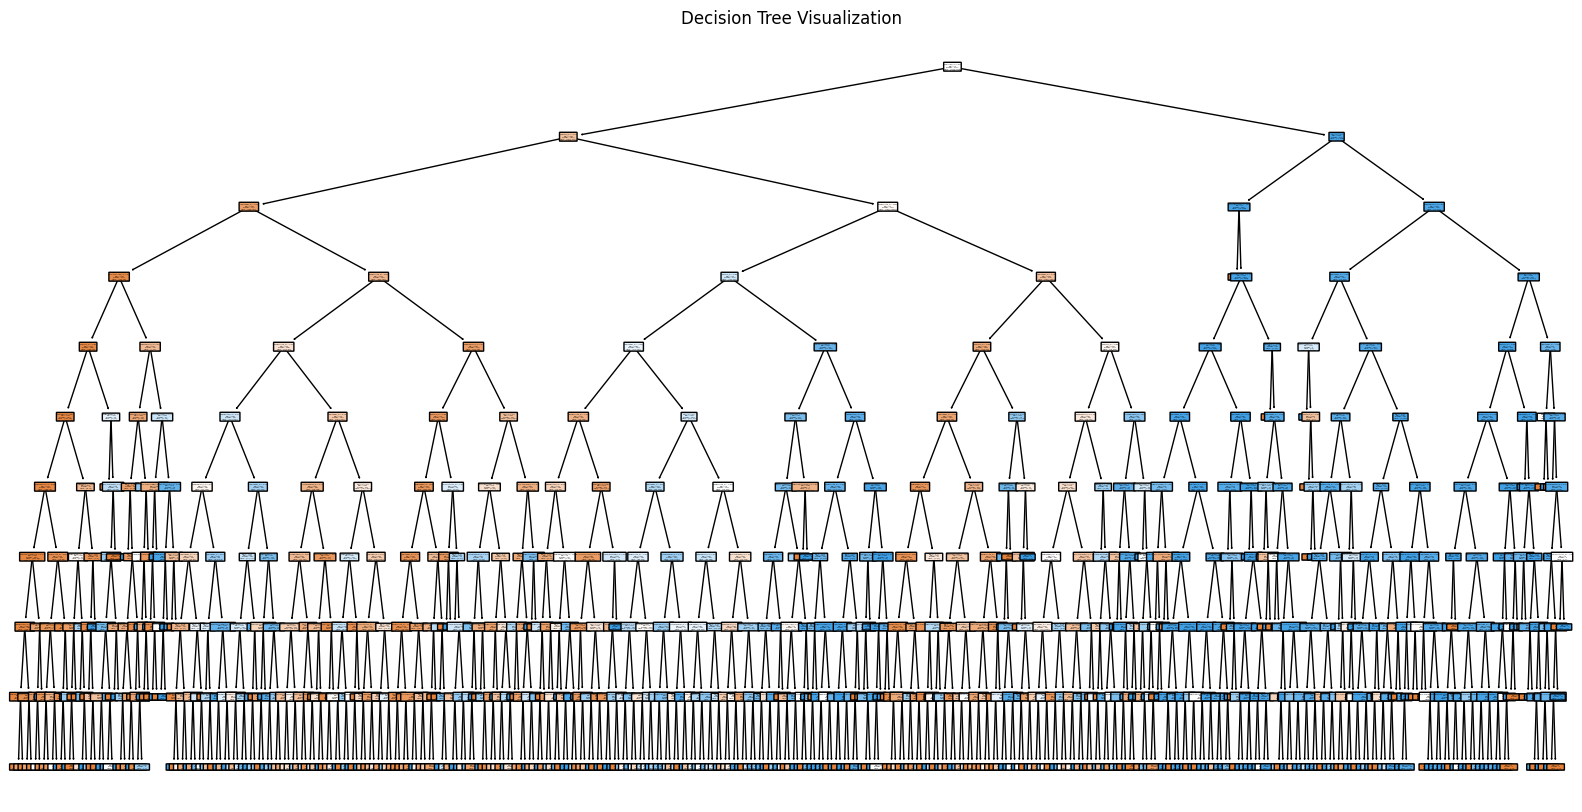

In [32]:
from sklearn.tree import plot_tree
decision_tree = pipeline.named_steps['classifier']

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, 
          feature_names=X_train.columns,  # Namen der Features
          class_names=['No Heart Attack', 'Heart Attack'],  # Klassenlabels
          filled=True, 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

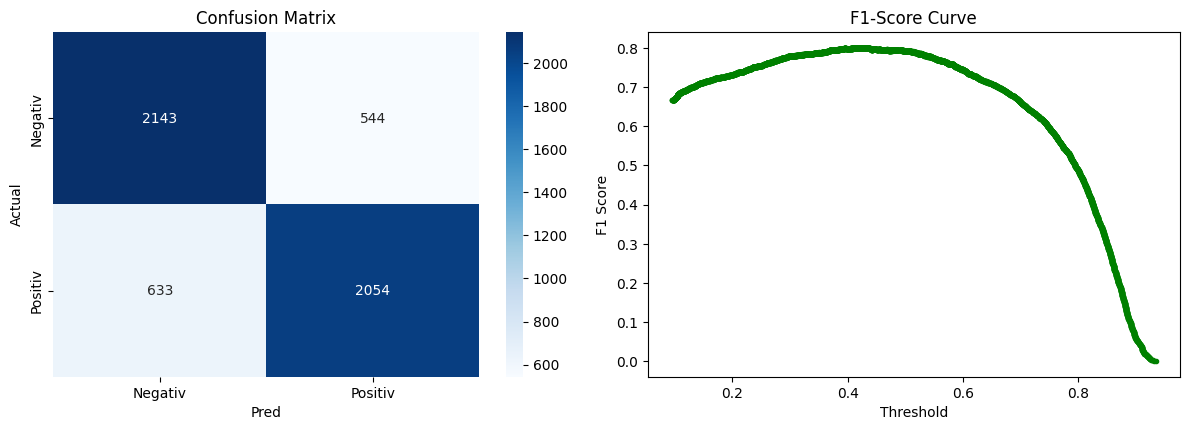

In [38]:
from sklearn.metrics import precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)  # Erster Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativ', 'Positiv'], yticklabels=['Negativ', 'Positiv'])
plt.title('Confusion Matrix')
plt.xlabel('Pred')
plt.ylabel('Actual')

y_proba = model.predict_proba(X_test)[:, 1]  
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

f1_scores = 2 * (precision * recall) / (precision + recall)
plt.subplot(2, 2, 2)  
plt.plot(thresholds, f1_scores[:-1], marker='.', color='green')  
plt.title('F1-Score Curve')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

# Plot anzeigen
plt.tight_layout()
plt.show()


In [32]:
# Zugriff auf das Modell im Pipeline-Schritt
rf_model = pipeline.named_steps['classifier']

# Feature-Wichtigkeit ausgeben
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sortieren und anzeigen
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                        Feature  Importance
17                  HadAngina_n    0.174024
12                AgeCategory_n    0.093017
5                           BMI    0.070197
4             WeightInKilograms    0.063256
31                  ChestScan_n    0.056271
9               GeneralHealth_n    0.051955
3                HeightInMeters    0.049915
8                RemovedTeeth_n    0.035903
2                    SleepHours    0.035607
0            PhysicalHealthDays    0.033897
11          TetanusLast10Tdap_n    0.024652
1              MentalHealthDays    0.024469
18                  HadStroke_n    0.023379
28          DifficultyWalking_n    0.022560
14               SmokerStatus_n    0.022010
13                HadDiabetes_n    0.020456
35              PneumoVaxEver_n    0.016939
24               HadArthritis_n    0.016102
6                         Sex_n    0.014316
10                   CovidPos_n    0.012307
32            AlcoholDrinkers_n    0.012171
15            ECigaretteUsage_n 

In [33]:
top_features = feature_importance['Feature'].head(30).tolist()
print(top_features)

['HadAngina_n', 'AgeCategory_n', 'BMI', 'WeightInKilograms', 'ChestScan_n', 'GeneralHealth_n', 'HeightInMeters', 'RemovedTeeth_n', 'SleepHours', 'PhysicalHealthDays', 'TetanusLast10Tdap_n', 'MentalHealthDays', 'HadStroke_n', 'DifficultyWalking_n', 'SmokerStatus_n', 'HadDiabetes_n', 'PneumoVaxEver_n', 'HadArthritis_n', 'Sex_n', 'CovidPos_n', 'AlcoholDrinkers_n', 'ECigaretteUsage_n', 'FluVaxLast12_n', 'LastCheckupTime_n', 'HIVTesting_n', 'PhysicalActivities_n', 'HadCOPD_n', 'DeafOrHardOfHearing_n', 'HadAsthma_n', 'HadDepressiveDisorder_n']


In [34]:
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

In [35]:
pipeline = create_pipeline(X_train_reduced, model_type='random_forest')
pipeline.fit(X_train_reduced, y_train)
y_pred = pipeline.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9482
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46516
           1       0.60      0.15      0.24      2687

    accuracy                           0.95     49203
   macro avg       0.78      0.57      0.61     49203
weighted avg       0.93      0.95      0.93     49203



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [36]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    X_train,  
    y_train,  
    validation_data=(X_test, y_test),
    epochs=50,  
    batch_size=32,  
    callbacks=[early_stopping],
    verbose=1 
)

Epoch 1/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.6313 - loss: 0.8220 - val_accuracy: 0.7270 - val_loss: 0.5380
Epoch 2/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7559 - loss: 0.5166 - val_accuracy: 0.7748 - val_loss: 0.4770
Epoch 3/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7769 - loss: 0.4776 - val_accuracy: 0.7763 - val_loss: 0.4711
Epoch 4/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.7879 - loss: 0.4578 - val_accuracy: 0.7881 - val_loss: 0.4524
Epoch 5/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.7928 - loss: 0.4474 - val_accuracy: 0.7886 - val_loss: 0.4468
Epoch 6/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.7976 - loss: 0.4333 - val_accuracy: 0.7953 - val_loss: 0.4366
Epoch 7/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8007 - loss: 0.4308 - val_accuracy: 0.7886 - val_loss: 0.4433
Epoch 8/50
672/672 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.8028 - loss: 0.4293 - 

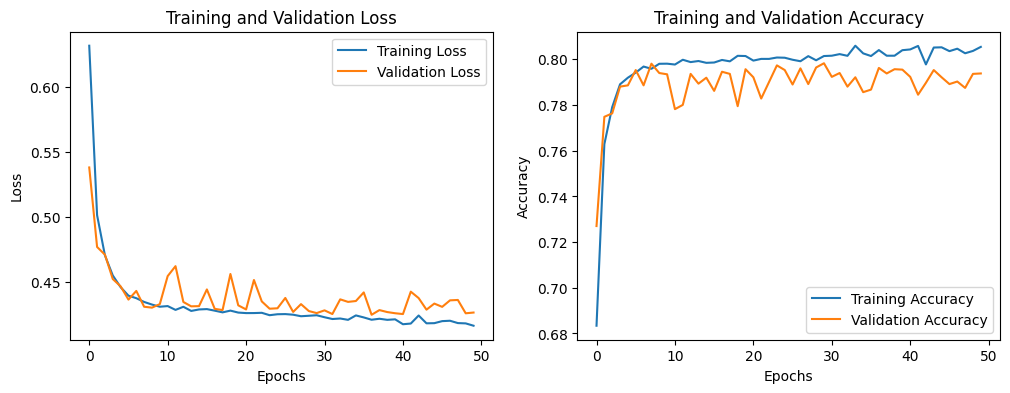

In [38]:
# Trainings- und Validierungsverlust
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
# Trainings- und Validierungsgenauigkeit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


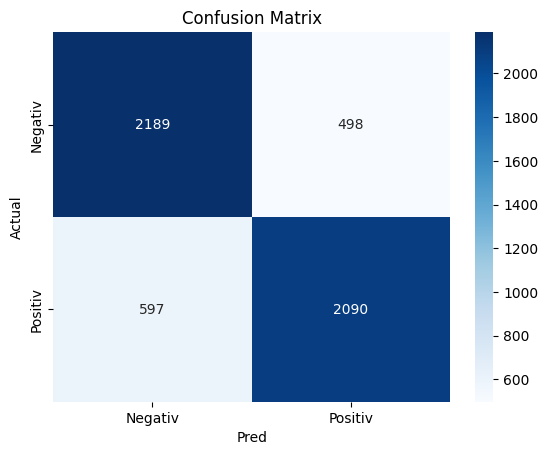

In [39]:
y_pred_probs = model.predict(X_test)  # Wahrscheinlichkeiten
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # In Binärwerte umwandeln
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativ', 'Positiv'], yticklabels=['Negativ', 'Positiv'])
plt.xlabel('Pred')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
